In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 닭고기 가격 그래프

In [60]:
price_df = pd.read_csv('..\data\닭고기시세20120101_20211231.csv', header=0, encoding='utf-8')

# 데이터 정렬
price_df.loc[::-1].reset_index(drop=True, inplace=True)

In [61]:
cols = ['5-6scale', '7-8scale','9-10scale', '11scale','12scale','13-16scale','닭고기 평균 가격']

for cols in cols:
    price_df[cols] = price_df[cols].str.replace(',', '')
    price_df[cols] = pd.to_numeric(price_df[cols])
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2996 non-null   object
 1   day         2996 non-null   object
 2   5-6scale    2996 non-null   int64 
 3   7-8scale    2996 non-null   int64 
 4   9-10scale   2996 non-null   int64 
 5   11scale     2996 non-null   int64 
 6   12scale     2996 non-null   int64 
 7   13-16scale  2996 non-null   int64 
 8   닭고기 평균 가격   2996 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 210.8+ KB


In [62]:
price_df = price_df[:90]
# 90일 동안의 닭고기 가격 추세 확인

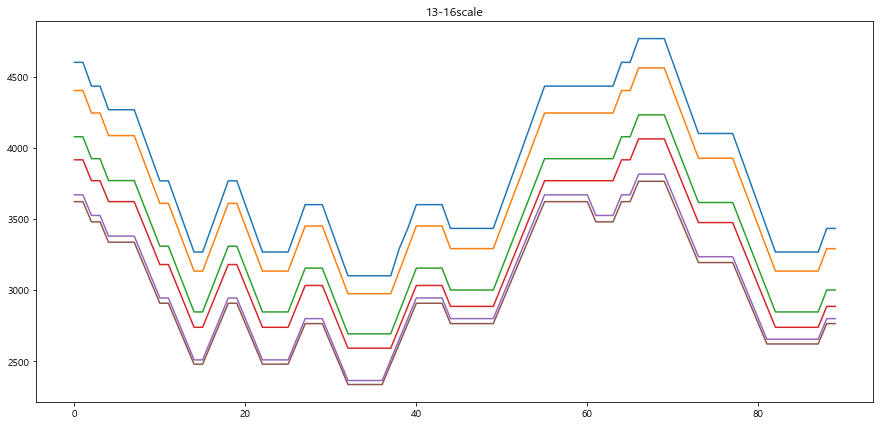

In [63]:
# 각 컬럼을 plot
plt.figure(figsize=(15,7))
price_df['5-6scale'].plot(title='5-6scale')
price_df['7-8scale'].plot(title='7-8scale')
price_df['9-10scale'].plot(title='9-10scale')
price_df['11scale'].plot(title='11scale')
price_df['12scale'].plot(title='12scale')
price_df['13-16scale'].plot(title='13-16scale')
    
plt.show()
# 각 호수별 닭고기 가격 추세가 항상 같음을 알 수 있었음

# 월별 데이터 그래프 확인

In [11]:
price = pd.read_csv('../pre_data/월별_닭고기가격.csv')
chicken = pd.read_csv('../pre_data/월별_도축현황.csv')
feedprice  = pd.read_csv('../pre_data/월별_사료값.csv')
oil_df = pd.read_csv('../pre_data/월별_원유가격.csv', encoding='utf8')
chich_df = pd.read_csv('../pre_data/월별_병아리가격.csv', encoding='utf8')
income_df = pd.read_csv('../pre_data/월별_닭고기_수입량.csv', encoding='utf8')

## 닭고기 가격 - 닭고기 수입량

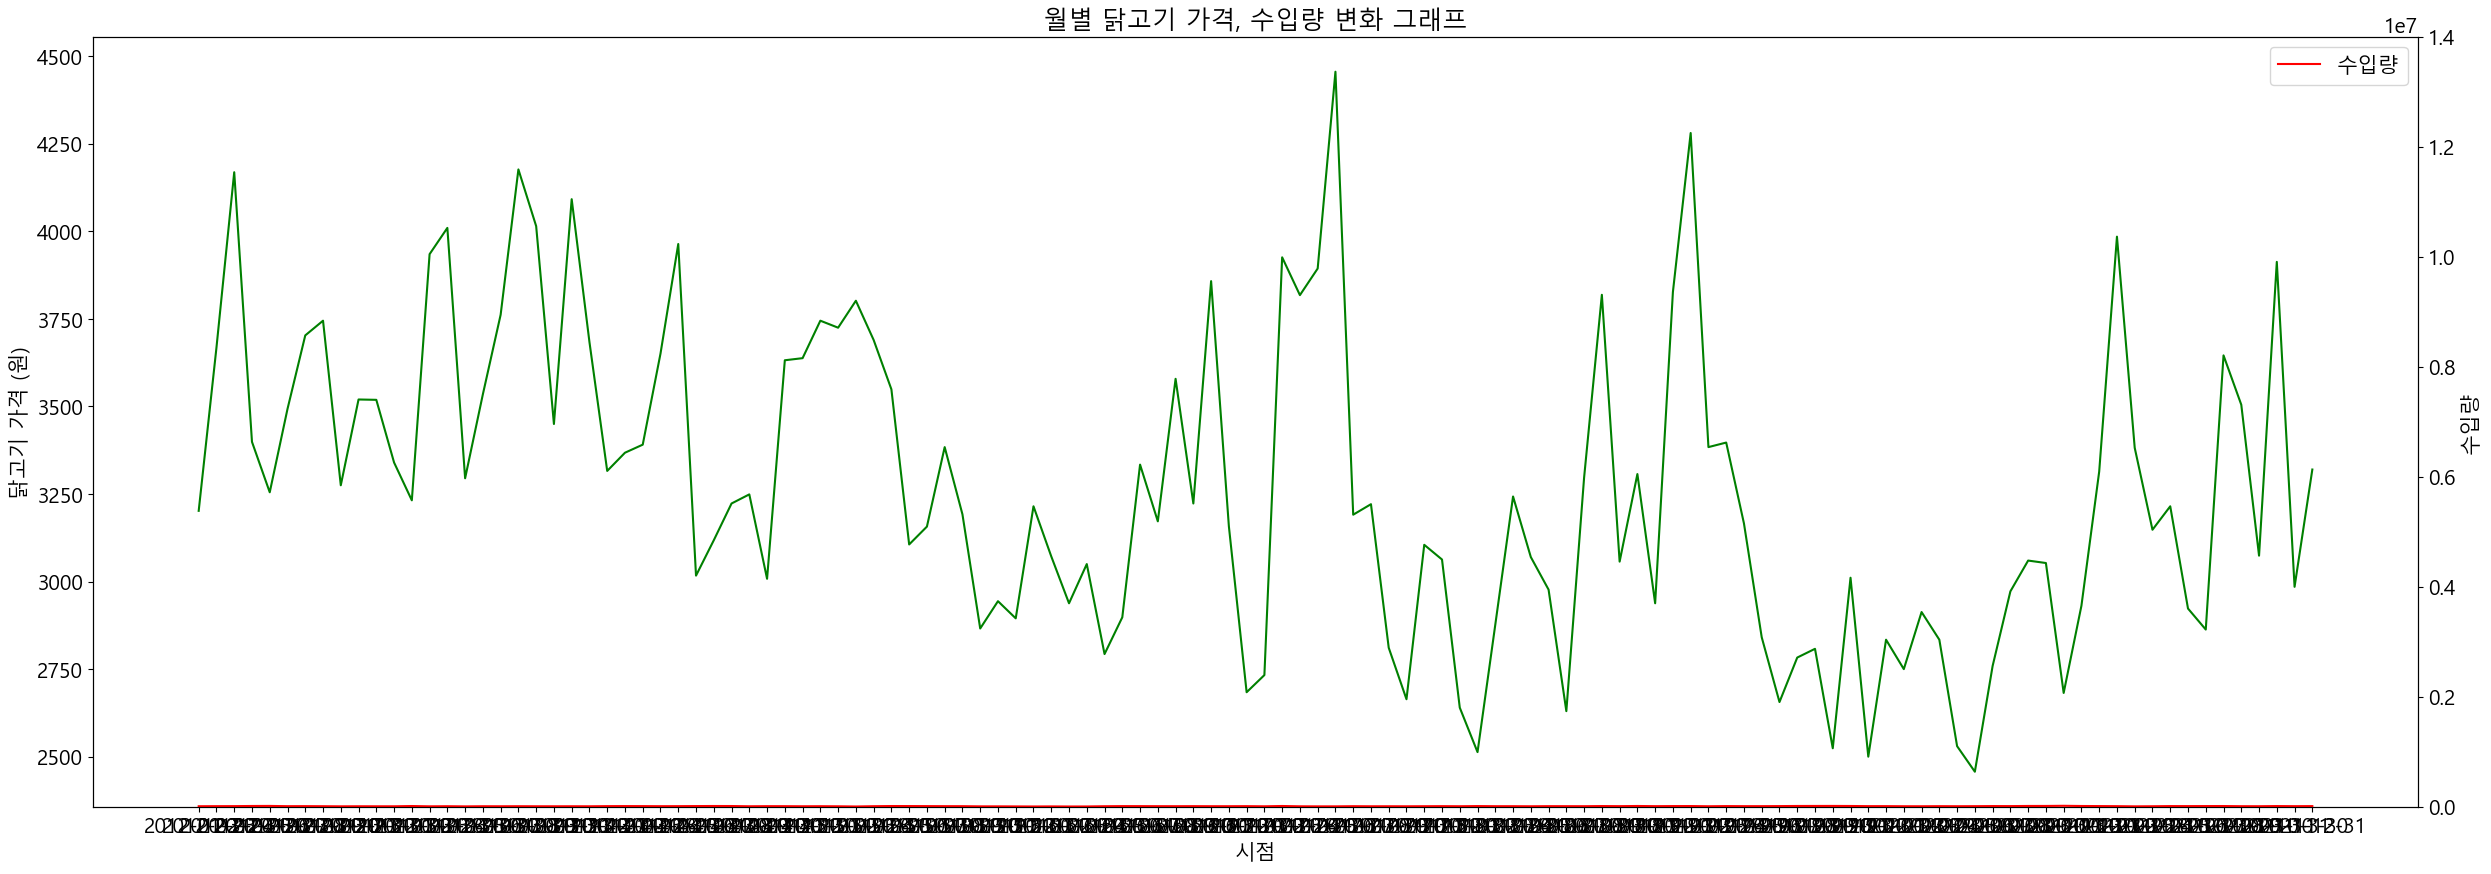

In [12]:
# 월별 닭고기 가격, 수입량 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price['date']
y1 = price['price']
y2 = income_df['import amount']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기 가격, 수입량 변화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격 (원)')
ax1.plot(x, y1, color='green',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('수입량')
ax2.set_ylim([0, 14000000])     # Y축의 범위: [ymin, ymax] 값의 차이가 너무 큼 // y축 레이블 값 표현 생각해봐야할듯
ax2.plot(x, y2, color='red',label='수입량')


plt.legend()
plt.show()

## 닭고기 가격 - 병아리 가격


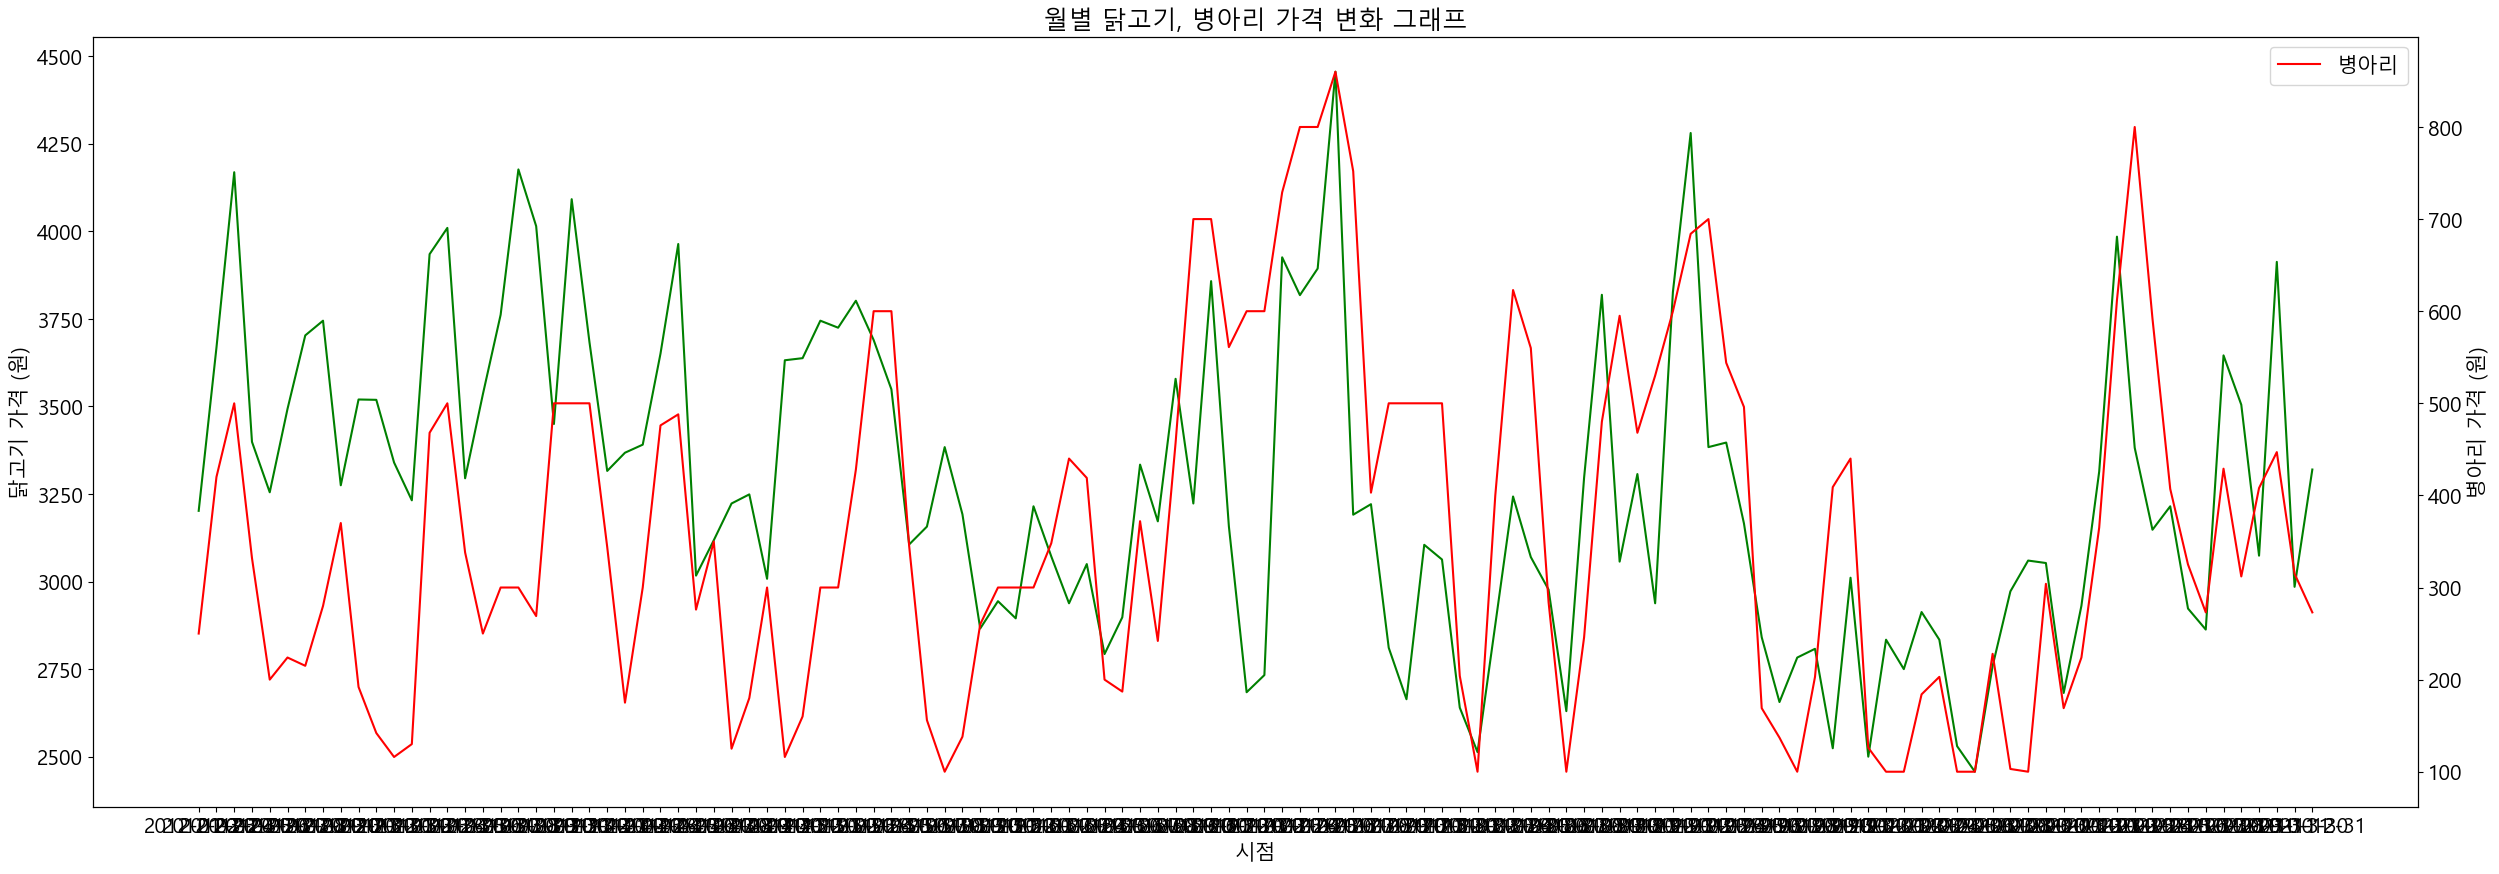

In [7]:
# 월별 닭고기, 병아리 가격 그래프

plt.style.use('default')
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price['date']
y1 = price['price']
y2 = chich_df['병아리(원/수)']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기, 병아리 가격 변화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격 (원)')
ax1.plot(x, y1, color='green',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('병아리 가격 (원)')
ax2.plot(x, y2, color='red',label='병아리')


plt.legend()
plt.show()

## 닭고기 가격 - 월별 원유 가격

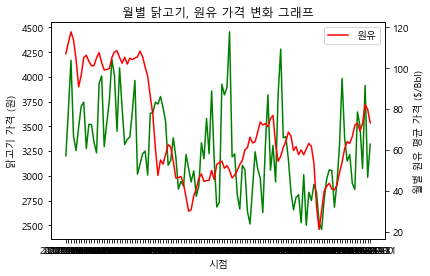

In [4]:
# 월별 닭고기, 원유 가격 그래프
# x축 레이블 값 돌리기, 범례 표시(원유만 나옴)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = price['date']
y1 = price['price']
y2 = oil_df['oil_avg']

fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기, 원유 가격 변화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격 (원)')
ax1.plot(x, y1, color='green',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('월별 원유 평균 가격 ($/Bbl)')
ax2.plot(x, y2, color='red',label='원유')


plt.legend()
plt.show()

## 닭고기 가격 - 월별 도축량

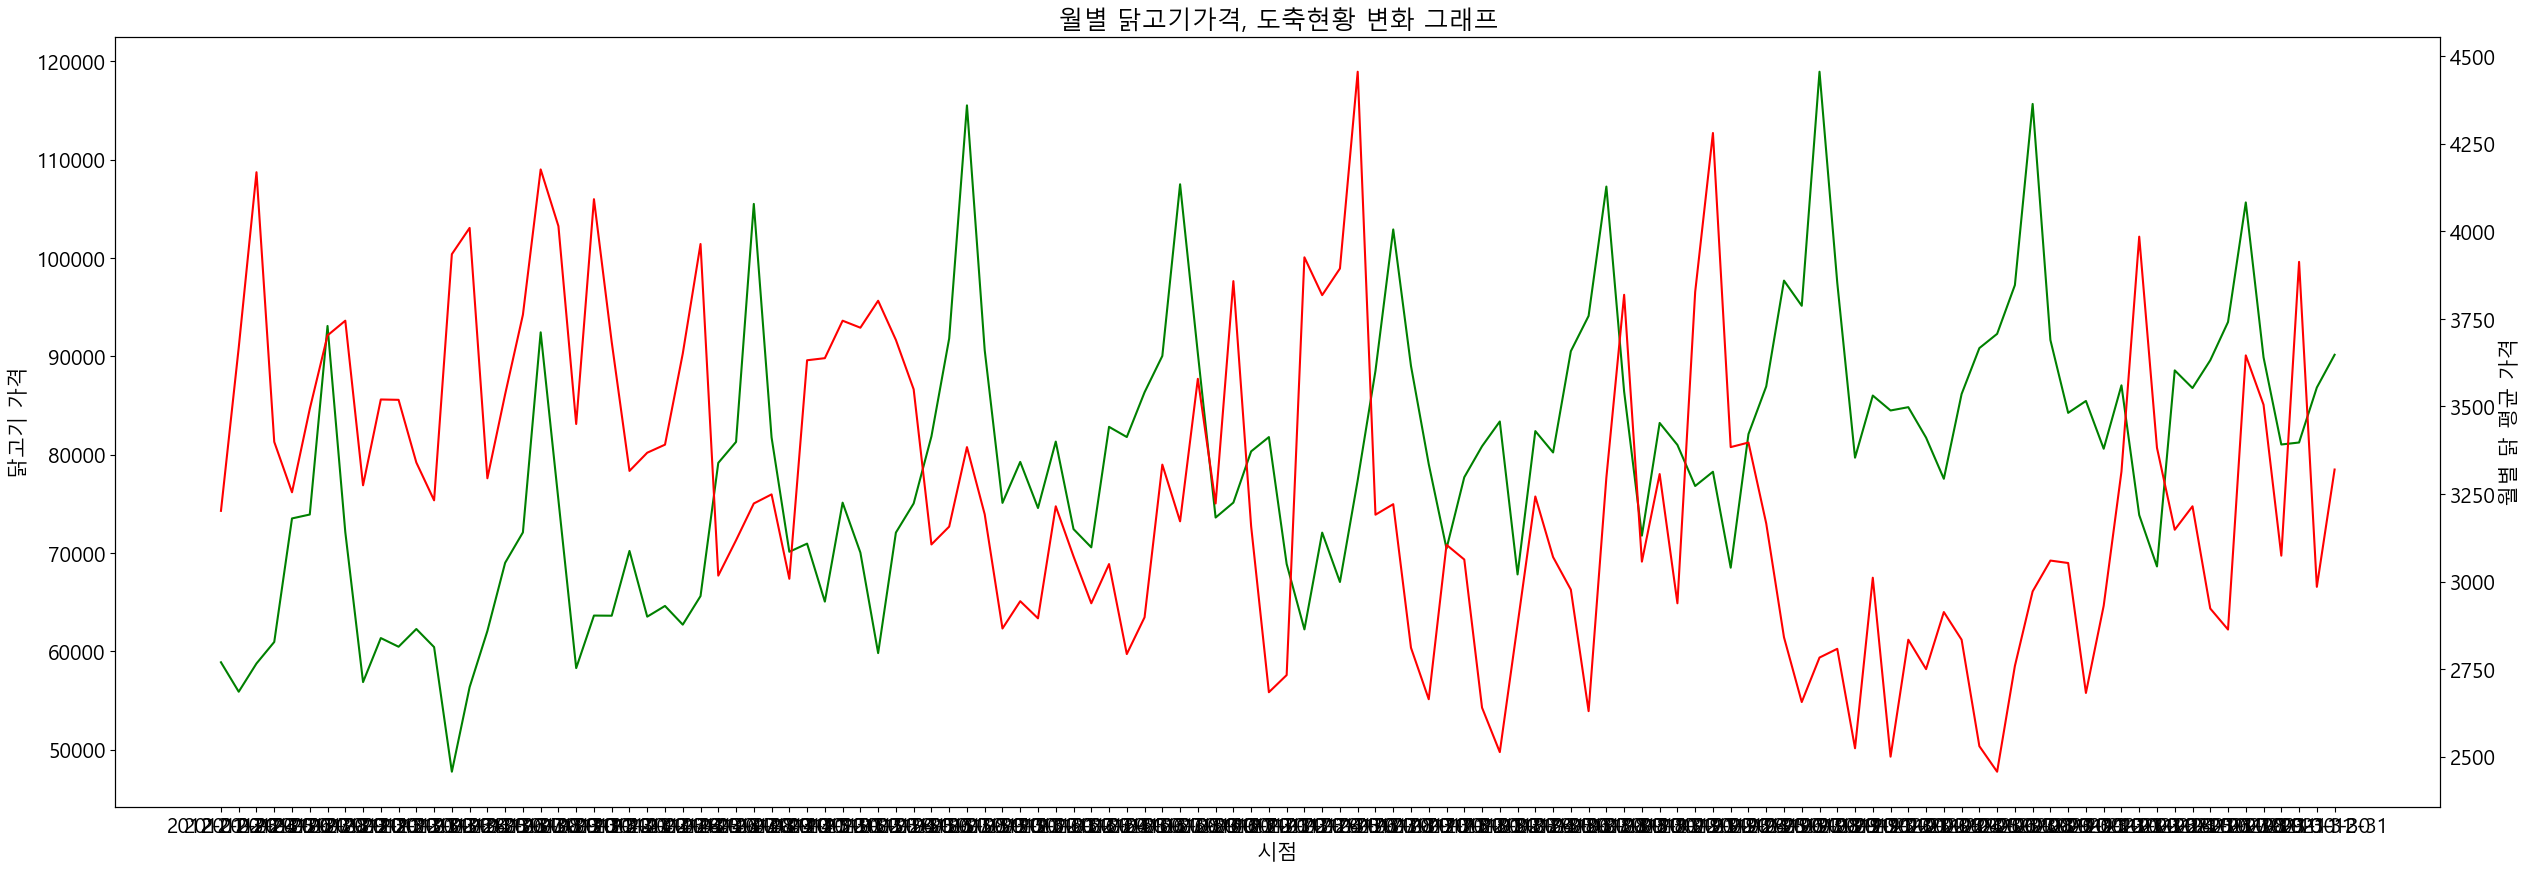

In [6]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = font_name

x = chicken['date']
y1 = chicken['도축']
y2 = price['price']
fig, ax1 = plt.subplots()
ax1.set_title('월별 닭고기가격, 도축현황 변화 그래프')
ax1.set_xlabel('시점')
ax1.set_ylabel('닭고기 가격')
ax1.plot(x, y1, color='green',label='닭고기')

ax2 = ax1.twinx()
ax2.set_ylabel('월별 닭 평균 가격')
ax2.plot(x, y2, color='red',label='원유')

plt.show()

## 닭고기 가격 - 사료 가격

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=price['date'], y=price['price'], name="닭고기 가격"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=feedprice['date'], y=feedprice['feedprice'], name="사료 가격"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="닭고기 가격과 사료 가격의 상관관계"
)

# Set x-axis title
fig.update_xaxes(title_text="기간")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> 닭고기 가격", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> 사료 가격 ", secondary_y=True)

fig.show()

# 일별 데이터 그래프

#### 상관관계에서 선택된 변수와 닭고기 가격 그래프만 그려서 확인
- 병아리가격
- 국제 유가
- 소 소비자가격
- 돼지 소비자가격
- 미국기준금리

In [81]:
data = pd.read_csv('../pre_data/일별_통합_모델링용.csv', index_col=0)
data = data.drop(columns='한국기준금리')
data

,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리
0,2021-12-31,4047,400,76.703333,111396,25177,0.25
1,2021-12-30,4047,400,77.850000,111396,25411,0.25
2,2021-12-29,3895,400,77.566667,112019,26891,0.25
3,2021-12-28,3895,400,77.130000,110865,26936,0.25
4,2021-12-27,3743,400,76.530000,109225,26993,0.25
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200,108.180000,58380,19570,0.75
2992,2012-01-05,3118,200,108.260000,58870,19830,0.75
2993,2012-01-04,3118,300,108.470000,61700,20300,0.75
2994,2012-01-03,3118,300,107.000000,61030,20330,0.75


In [82]:
graph_cols = ['병아리(원/수)','oil_avg','소_소비자가_int','돼지_소비자가_int','미국기준금리']

for graph_cols in graph_cols:
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['price'], name="닭고기 가격"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=data['date'], y=data[graph_cols], name=graph_cols),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text=f"닭고기 가격과 {graph_cols}의 상관관계"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="기간")

    # Set y-axes titles
    fig.update_yaxes(title_text="닭고기 가격", secondary_y=False)
    fig.update_yaxes(title_text=graph_cols, secondary_y=True)

    fig.show()